200
{'latitude': 40.4, 'longitude': -3.6999989, 'generationtime_ms': 0.29909610748291016, 'utc_offset_seconds': 7200, 'timezone': 'Europe/Madrid', 'timezone_abbreviation': 'GMT+2', 'elevation': 666.0, 'hourly_units': {'time': 'iso8601', 'pm10': 'μg/m³', 'pm2_5': 'μg/m³', 'carbon_monoxide': 'μg/m³', 'nitrogen_dioxide': 'μg/m³'}, 'hourly': {'time': ['2025-05-04T00:00', '2025-05-04T01:00', '2025-05-04T02:00', '2025-05-04T03:00', '2025-05-04T04:00', '2025-05-04T05:00', '2025-05-04T06:00', '2025-05-04T07:00', '2025-05-04T08:00', '2025-05-04T09:00', '2025-05-04T10:00', '2025-05-04T11:00', '2025-05-04T12:00', '2025-05-04T13:00', '2025-05-04T14:00', '2025-05-04T15:00', '2025-05-04T16:00', '2025-05-04T17:00', '2025-05-04T18:00', '2025-05-04T19:00', '2025-05-04T20:00', '2025-05-04T21:00', '2025-05-04T22:00', '2025-05-04T23:00', '2025-05-05T00:00', '2025-05-05T01:00', '2025-05-05T02:00', '2025-05-05T03:00', '2025-05-05T04:00', '2025-05-05T05:00', '2025-05-05T06:00', '2025-05-05T07:00', '2025-05-0

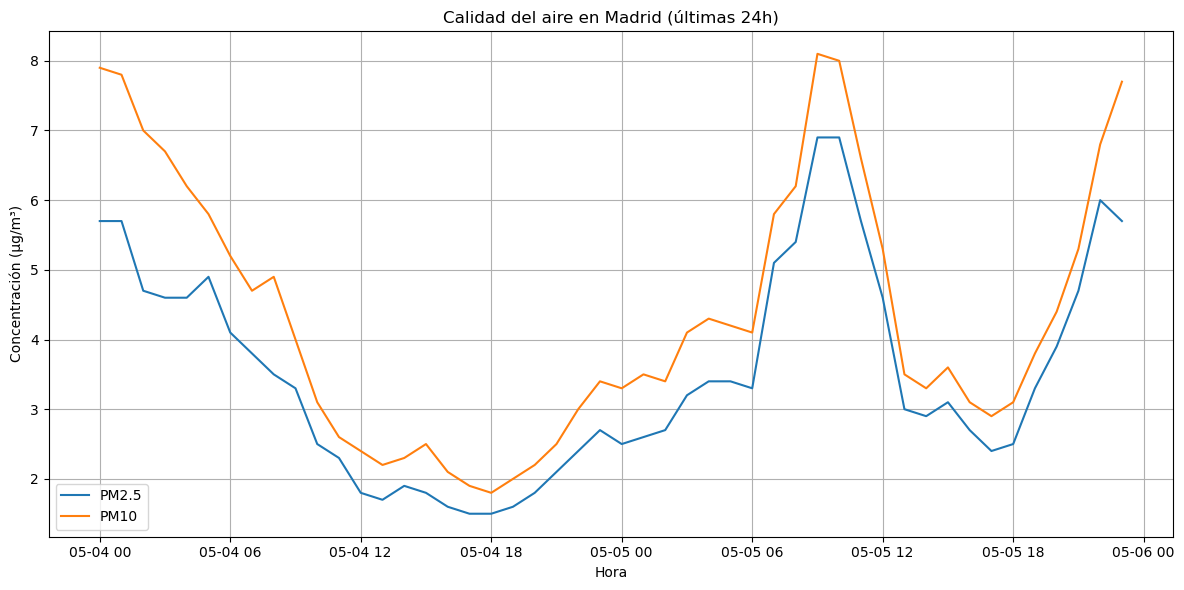

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Fechas
today = datetime.today()
yesterday = today - timedelta(days=1)

# URL y parámetros
url = "https://air-quality-api.open-meteo.com/v1/air-quality"
params = {
    "latitude": 40.4168,
    "longitude": -3.7038,
    "start_date": yesterday.strftime("%Y-%m-%d"),
    "end_date": today.strftime("%Y-%m-%d"),
    "hourly": "pm10,pm2_5,carbon_monoxide,nitrogen_dioxide",
    "timezone": "Europe/Madrid"
}

# Petición
response = requests.get(url, params=params)
print(response.status_code)
data = response.json()
print(data)

# DataFrame
df = pd.DataFrame(data['hourly'])
df['time'] = pd.to_datetime(df['time'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['pm2_5'], label='PM2.5')
plt.plot(df['time'], df['pm10'], label='PM10')
plt.xlabel("Hora")
plt.ylabel("Concentración (µg/m³)")
plt.title("Calidad del aire en Madrid (últimas 24h)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
